In [1]:
import sys
sys.path.append("/reg/neh/home/haoyuan/Documents/my_repos/pysingfel/")

import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import pysingfel as ps
import time

In [2]:
# Create a particle object
particle = ps.Particle()

particle.read_pdb('../input/3iyf.pdb', ff='WK')

# Load beam
beam = ps.Beam('../input/exp_sim.beam') 

# Load and initialize the detector
det = ps.PnccdDetector(geom = '../../lcls_detectors/amo86615/PNCCD::CalibV1/Camp.0:pnCCD.1/geometry/0-end.data', 
                       beam = beam)

In [3]:
particle.rotate_randomly()

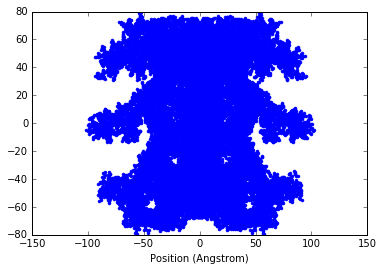

In [4]:
plt.plot(particle.atom_pos[:,0]*1e10,particle.atom_pos[:,1]*1e10,'.'); 
plt.xlabel('Position (Angstrom)')
plt.show()

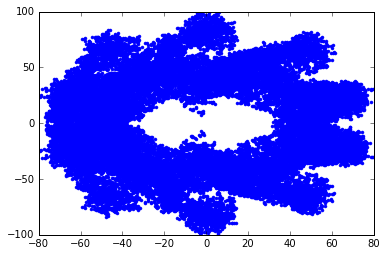

In [5]:
plt.plot(particle.atom_pos[:,1]*1e10,particle.atom_pos[:,2]*1e10,'.'); plt.show()

# Create a 2D pattern

In [6]:
tic = time.time()
pattern = det.get_photons(device='gpu', particle=particle)
toc = time.time()
print("It takes {:.2f} seconds to finish the calculation.".format(toc-tic))

It takes 7.11 seconds to finish the calculation.


# Show the field

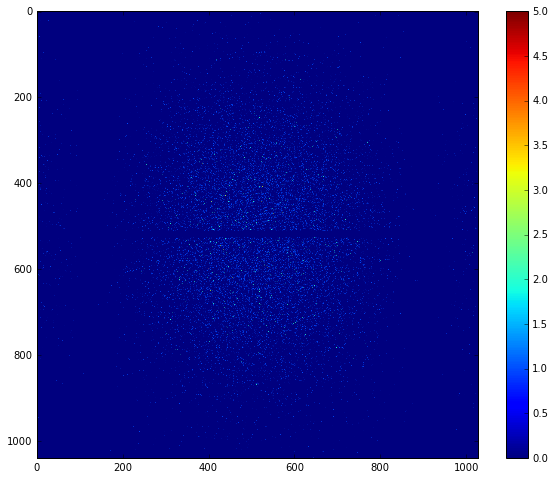

In [7]:
fig = plt.figure(figsize=(10, 8))

plt.imshow(det.assemble_image_stack(pattern),vmin=0, vmax=5)
plt.colorbar()
plt.show()